# Data Visualisation of COVID-19

### importing libraries

In [61]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

from datetime import datetime

In [100]:
data = pd.read_csv('complete.csv')
data1 = data.rename(columns={'Name of State / UT':'State','Cured/Discharged/Migrated':'Cured','Total Confirmed cases':'Confirmed'})

In [101]:
data2=data1[['Date','Confirmed','Death']]
data2 = data2.set_index('Date')
data2

,Confirmed,Death
Date,,
2020-01-30,1,0
2020-01-31,1,0
2020-02-01,2,0
2020-02-02,3,0
2020-02-03,3,0
...,...,...
2020-04-19,809,18
2020-04-19,2,0
2020-04-19,969,14


# Confirmed cases vs Death cases

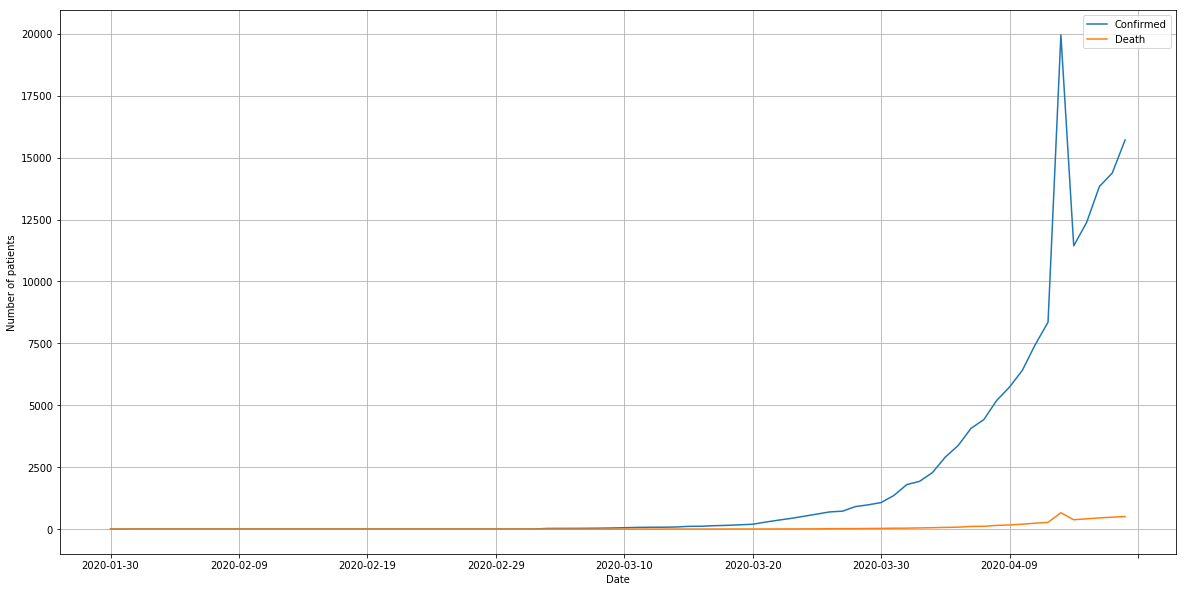

In [114]:
conf =  data2.groupby('Date')['Confirmed'].sum().reset_index().set_index('Date')
death = data2.groupby('Date')['Death'].sum().reset_index().set_index('Date')
co = pd.merge(conf,death,right_on='Date',left_on='Date')
co.plot(figsize=(20,10),grid=True)
plt.ylabel('Number of patients')
plt.show()

# Most Death cases in State

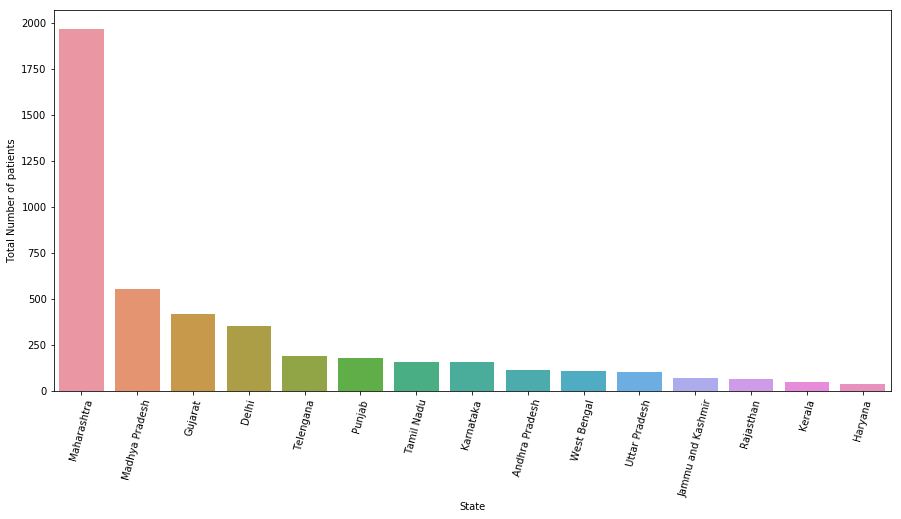

In [128]:
death_count = data1.groupby('State').sum()['Death'].reset_index().sort_values('Death',ascending=False)[:15]
plt.figure(figsize=(15,7))
sns.barplot(x=death_count['State'], y=death_count['Death'], data=death_count)
plt.ylabel('Total Number of patients')
plt.xticks(rotation=75)
plt.show()

# Most confirmed cases in State

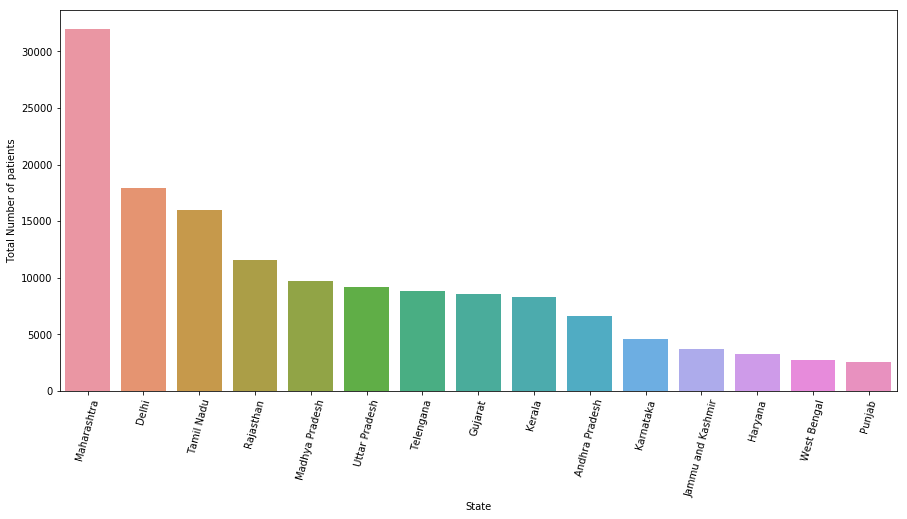

In [129]:
death_count = data1.groupby('State').sum()['Confirmed'].reset_index().sort_values('Confirmed',ascending=False)[:15]
plt.figure(figsize=(15,7))
sns.barplot(x=death_count['State'], y=death_count['Confirmed'], data=death_count)
plt.ylabel('Total Number of patients')
plt.xticks(rotation=75)
plt.show()

In [164]:
data = pd.read_csv('patients_data.csv').drop(['patient_number', 'state_patient_number','source_1', 'source_2', 'source_3',
       'backup_notes','status_change_date'],1)
data

,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,current_status,notes,suspected_contacted_patient,nationality,type_of_transmission
0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported
1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported
2,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported
3,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported
4,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported
...,...,...,...,...,...,...,...,...,...,...,...,...
15718,18/04/2020,NaN,NaN,NaN,NaN,Delhi,DL,Hospitalized,Details awaited,NaN,NaN,NaN
15719,18/04/2020,NaN,NaN,NaN,NaN,Delhi,DL,Hospitalized,Details awaited,NaN,NaN,NaN
15720,18/04/2020,NaN,NaN,NaN,NaN,Delhi,DL,Hospitalized,Details awaited,NaN,NaN,NaN
15721,18/04/2020,NaN,NaN,NaN,NaN,Delhi,DL,Hospitalized,Details awaited,NaN,NaN,NaN


In [165]:
rec = data[['date_announced','current_status']]
rec.dropna(inplace = True)

# Total counts of patient type

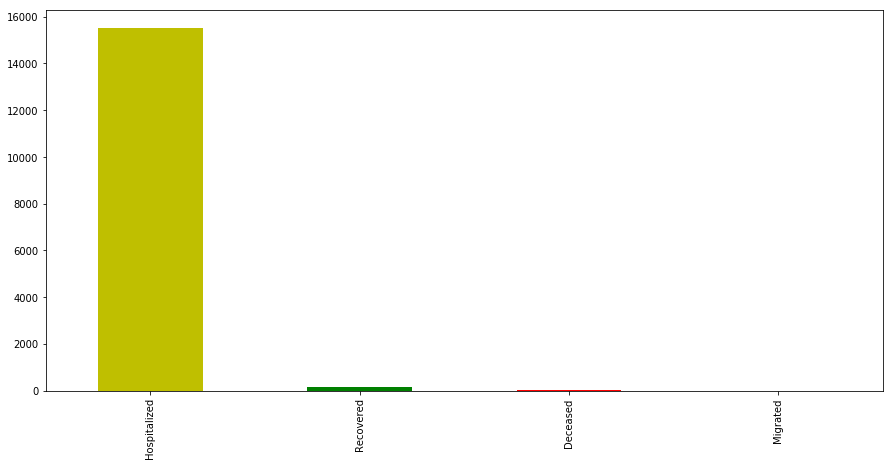

In [166]:
plt.figure(figsize=(15,7))
rec.current_status.value_counts().plot(kind='bar', color = ['y','g','r'])
plt.show()

In [169]:
gender = data[['date_announced', 'gender','current_status']]
gender.dropna(inplace = True)

In [170]:
gender

,date_announced,gender,current_status
0,30/01/2020,F,Recovered
3,02/03/2020,M,Recovered
4,02/03/2020,M,Recovered
5,03/03/2020,M,Recovered
20,04/03/2020,F,Recovered
...,...,...,...
14899,18/04/2020,M,Hospitalized
14900,18/04/2020,F,Hospitalized
14901,18/04/2020,F,Hospitalized
14902,18/04/2020,M,Hospitalized


# Male vs Female infected

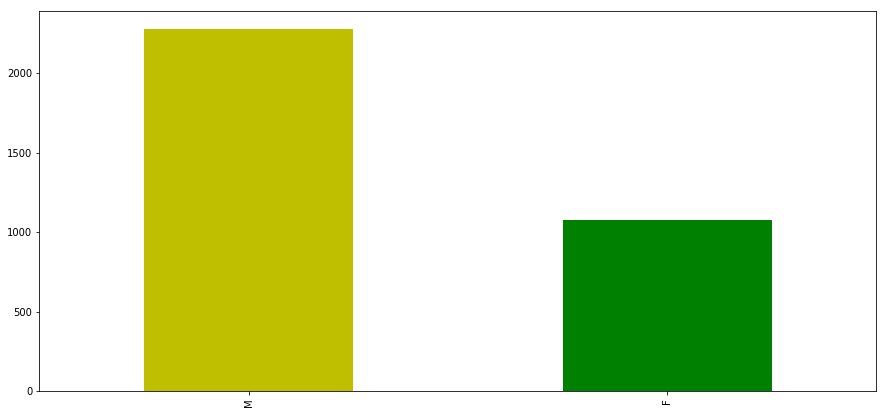

In [174]:
plt.figure(figsize=(15,7))
gender.gender.value_counts().plot(kind='bar', color = ['y','g'])
plt.show()